In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data=datasets.MNIST(root="E:/github/mini_projects/additional_projects/MNIST/data",train=True,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 1095392.30it/s]


Extracting E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw\train-images-idx3-ubyte.gz to E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 118137.48it/s]


Extracting E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw\train-labels-idx1-ubyte.gz to E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:19<00:00, 83368.84it/s] 


Extracting E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw\t10k-images-idx3-ubyte.gz to E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw\t10k-labels-idx1-ubyte.gz to E:/github/mini_projects/additional_projects/MNIST/data\MNIST\raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: E:/github/mini_projects/additional_projects/MNIST/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data=datasets.MNIST(root="E/PYTORCH_NOTEBOOKS/Data",train=False,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 883735.59it/s] 


Extracting E/PYTORCH_NOTEBOOKS/Data\MNIST\raw\train-images-idx3-ubyte.gz to E/PYTORCH_NOTEBOOKS/Data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 84306.49it/s]


Extracting E/PYTORCH_NOTEBOOKS/Data\MNIST\raw\train-labels-idx1-ubyte.gz to E/PYTORCH_NOTEBOOKS/Data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 977016.91it/s] 


Extracting E/PYTORCH_NOTEBOOKS/Data\MNIST\raw\t10k-images-idx3-ubyte.gz to E/PYTORCH_NOTEBOOKS/Data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting E/PYTORCH_NOTEBOOKS/Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to E/PYTORCH_NOTEBOOKS/Data\MNIST\raw



In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: E/PYTORCH_NOTEBOOKS/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=500,shuffle=True)

Labels:  [   3    6    0    5    5    1    1    8    6    5    7    9]


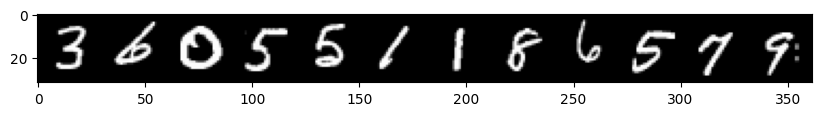

In [8]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break


print('Labels: ', labels[:12].numpy())


im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [9]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self,in_size=784,out_size=10,layers=[120,84]):
        super().__init__()
        self.fc1=nn.Linear(in_size,layers[0])
        self.fc2=nn.Linear(layers[0],layers[1])
        self.fc3=nn.Linear(layers[1],out_size)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1)

In [10]:
model=MultiLayerPerceptron()

In [11]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [12]:
import time
start_time=time.time()
epochs=10
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for b,(x_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred=model(x_train.view(100,-1))
        loss=criterion(y_pred,y_train)
        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted== y_train).sum()
        trn_corr+=batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b,(x_test,y_test) in enumerate(test_loader):
            y_val=model(x_test.view(500,-1))
            predicted=torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
    loss=criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 


Duration: 89 seconds


In [13]:
test_load_all=DataLoader(test_data,batch_size=10000,shuffle=True)

with torch.no_grad():
    correct_predictions=0
    for x_test, y_test in test_load_all:
        y_value=model(x_test.view(len(x_test),-1))
        predicted=torch.max(y_value,1)[1]
        correct_predictions += (predicted== y_test).sum()
print(f'Test accuracy: {correct_predictions.item()}/{len(test_data)} = {correct_predictions.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9753/10000 =  97.530%


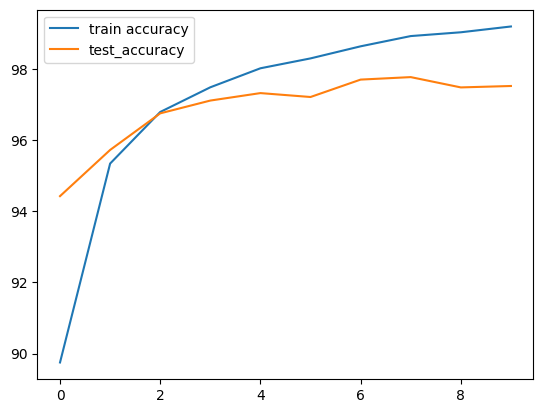

In [14]:
train_accuracy=[t/600 for t in train_correct]
test_accuracy=[t/100 for t in test_correct]

plt.plot(train_accuracy,label='train accuracy')
plt.plot(test_accuracy,label='test_accuracy')
plt.legend()

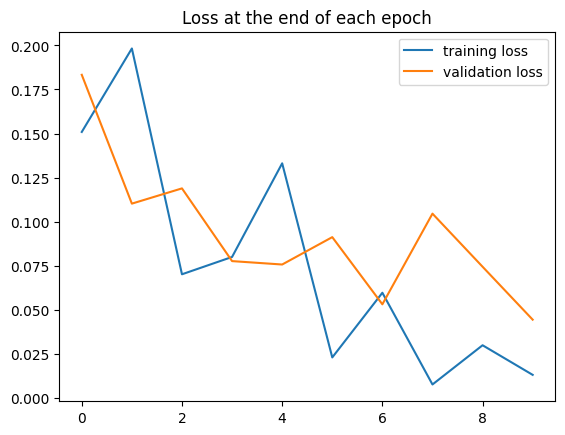

In [15]:
num_train_losses=[i.detach().numpy() for i in train_losses]
num_test_losses=[i.detach().numpy() for i in test_losses]
plt.plot(num_train_losses, label='training loss')
plt.plot(num_test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();